
**Neural Networks Applied to Computer Vision/Image Recognition/Classification**

Image recognition/Object Classification is one of the most popular and well researched field of Computer Vision. Mathematically acceptable methods are being rapidly developed to replicate real biological processes for automatic recognition of people, animals, stationary and moving objects as well as places. Many applications are available on smart phones, that can perform sophisticated image recognition task such as face recognition and etc.

This project aims to implement and compare different computer vision (CV)/machine learning (ML) algorithms which can train a computer to discriminate between different types of objects.

In [29]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import CSVLogger
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical  # Updated import statement
from tensorflow.keras.models import load_model

from keras.datasets import cifar10
# from keras.utils.np_utils import to_categorical  # Remove this line

import random
np.random.seed(0)


You have to implement the following algorithmic pipeline to solve this problem
1.	Read/Load a set of raw images from the CIFAR10 public dataset. The dataset can easily be downloaded from Internet. You can download and save the dataset in your hard drive and later work on it if you are using a local installation of Python such as Anaconda. However, if you prefer to use Google Colab, you can download it at the runtime, or else copy it to your google drive and mount your drive in the google Colab.  
2.	Extract best possible features from the raw images using classical computer vision techniques. More specifically, you are advised to use the combinations of Feature Detectors/Descriptors, as described in the assignment handout.



In [ ]:
import cv2
import numpy as np
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from skimage.feature import hog

# Load CIFAR-10 dataset
(X_train_raw, y_train_all), (X_test_raw, y_test_all) = cifar10.load_data()

# Select a subset of the dataset for demonstration purposes
X_train_new = X_train_raw[0:500]
X_test_new = X_test_raw[0:500]
y_train = y_train_all[0:500]
y_test = y_test_all[0:500]

# Function to extract Harris corner and HOG features
def extract_features(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Harris corner detection
    harris_corners = cv2.cornerHarris(gray, 2, 3, 0.04)
    harris_corners = cv2.dilate(harris_corners, None)

    # HOG feature extraction
    hog_features, _ = hog(gray, visualize=True)
    size = int(np.sqrt(hog_features.size))

    # Resize Harris corner to match HOG dimensions
    harris_corners_resized = cv2.resize(harris_corners, (size, size))

    # Reshape HOG features to (x, y, 1)
    hog_features = hog_features.reshape((size, size, 1))

    # Combine Harris corner and HOG features
    combined_features = np.concatenate([harris_corners_resized[:, :, np.newaxis], hog_features], axis=-1)

    return combined_features

# Apply feature extraction to each image in the dataset
X_train = np.array([extract_features(img) for img in X_train_new])
X_test = np.array([extract_features(img) for img in X_test_new])

# Print the shapes before and after feature extraction
print("Before Feature Extraction:")
print(X_train_new.shape)
print(X_test_new.shape)

print("\nAfter Combined Feature Extraction:")
print(X_train.shape)
print(X_test.shape)


170498071/170498071 [==============================] - 3s 0us/step
Before Feature Extraction:
(500, 32, 32, 3)
(500, 32, 32, 3)

After Combined Feature Extraction:
(500, 18, 18, 2)
(500, 18, 18, 2)


Please note that the you code above may download the data in the raw format, i.e, raw images of (rows x columns) size each.

As exlplained in the assignment houndout, you are requried to extract the best possible features from the raw images using classical computer vision techniques

In [ ]:
# X_train = X_train_all[0:500]
# y_train = y_train_all[0:500]
# X_test = X_test_all[0:500]
# y_test = y_test_all[0:500]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(500, 18, 18, 2)
(500, 18, 18, 2)
(500, 1)
(500, 1)


In [ ]:
np.shape(X_train)[2]


18

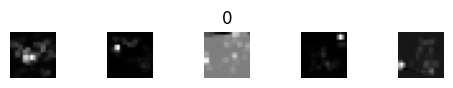

In [ ]:
# num_of_samples = []
# cols = 5
# num_classes = 10
# fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
# fig.tight_layout()
# for i in range(cols):
#     for j in range(num_classes):
#         x_selected = X_train[y_train == j]
#         axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
#         axs[j][i].axis("off")
#         if i == 2:
#             axs[j][i].set_title(str(j))
#             num_of_samples.append(len(x_selected))
num_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=1, ncols=cols, figsize=(5, 2))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        # Use np.argmax to find the indices where y_train equals j
        indices = np.where(np.argmax(y_train, axis=1) == j)[0]

        # Check if indices is not empty
        if indices.size > 0:
            # Randomly select an index from the matching indices
            random_index = random.choice(indices)

            # Display a single channel from the combined features
            axs[i].imshow(X_train[random_index, :, :, 0], cmap='gray')  # Adjust the channel index if needed
            axs[i].axis("off")

            if i == 2:
                axs[i].set_title(str(j))
                num_of_samples.append(len(indices))

plt.show()
# num_of_samples = []
# cols = 5
# num_classes = 10
# fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 8))
# fig.tight_layout()

# img_shape = (32, 32, 3)  # Replace 3 with the actual number of channels

# for i in range(cols):
#     for j in range(num_classes):
#         x_selected = X_train[y_train.reshape(-1) == j]
#         random_index = random.randint(0, len(x_selected) - 1)
#         img = x_selected[random_index].reshape(*img_shape)
#         axs[j][i].imshow(img, cmap=plt.get_cmap("gray"))
#         axs[j][i].axis("off")

#         if i == 2:
#             axs[j][i].set_title(str(j))
#             num_of_samples.append(len(x_selected))

# plt.show()


[500]


Text(0, 0.5, 'Number of images')

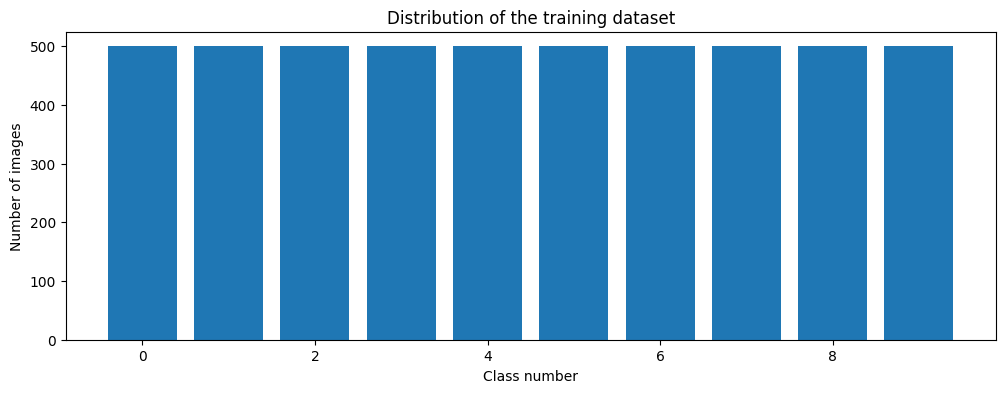

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [ ]:
print(type(y_train[0]))
y_train= to_categorical(y_train,10)
y_train[0]
# y_test = to_categorical(y_test,10)

<class 'numpy.ndarray'>


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
X_train=X_train/255
X_test= X_test/255

In [ ]:
np.shape(X_train)

(500, 18, 18, 2)

In [ ]:
#28x28=784
num_pixels = np.shape(X_train)[1] * np.shape(X_train)[2] * np.shape(X_train)[3]
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)




In [ ]:
print(X_train.shape)
print(X_test.shape)

(500, 648)
(500, 648)


#Builtin ANN Model for Reference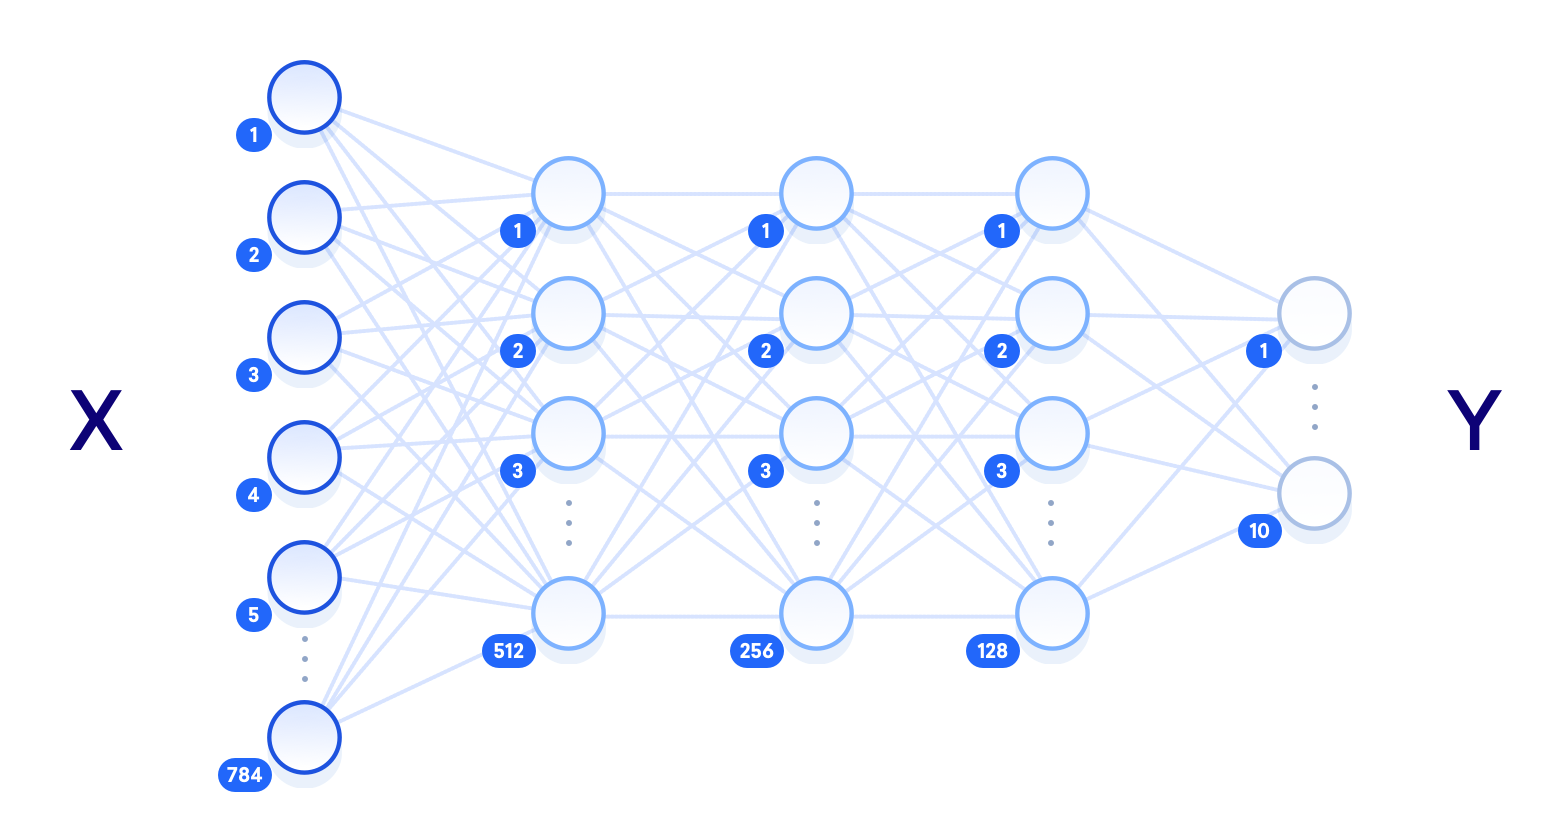

In [39]:
def create_model():
    model = Sequential()
    model.add(Dense(20, input_dim=num_pixels, activation='relu'))  # Input layer with 20 units
    model.add(Dense(20, activation='relu'))  # Hidden layer 1 with 20 units
    model.add(Dense(20, activation='relu'))  # Hidden layer 2 with 20 units
    model.add(Dense(20, activation='relu'))  # Hidden layer 3 with 20 units
    model.add(Dense(20, activation='relu'))  # Hidden layer 4 with 20 units
    model.add(Dense(20, activation='relu'))  # Hidden layer 5 with 20 units
    model.add(Dense(num_classes, activation='softmax'))  # Output layer with num_classes units

    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    # model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [40]:
  model = create_model()
  print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 20)                12980     
                                                                 
 dense_12 (Dense)            (None, 20)                420       
                                                                 
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dense_15 (Dense)            (None, 20)                420       
                                                                 
 dense_16 (Dense)            (None, 20)                420       
                                                                 
 dense_17 (Dense)            (None, 10)               

In [41]:
csv_logger=CSVLogger('/content/drive/MyDrive/TrainedModels/MnistANN.log',separator=',',append=False)

In [42]:
num_epochs=1000

In [43]:
history=model.fit(X_train,y_train,validation_split=0.20,epochs=num_epochs,batch_size=128,verbose=1)

Epoch 1/1000
4/4 [==============================] - 2s 86ms/step - loss: 2.3024 - accuracy: 0.1175 - val_loss: 2.3032 - val_accuracy: 0.0900
Epoch 2/1000
4/4 [==============================] - 0s 13ms/step - loss: 2.3017 - accuracy: 0.1400 - val_loss: 2.3039 - val_accuracy: 0.0900
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 2.3007 - accuracy: 0.1400 - val_loss: 2.3047 - val_accuracy: 0.0900
Epoch 4/1000
4/4 [==============================] - 0s 13ms/step - loss: 2.2998 - accuracy: 0.1400 - val_loss: 2.3056 - val_accuracy: 0.0900
Epoch 5/1000
4/4 [==============================] - 0s 14ms/step - loss: 2.2987 - accuracy: 0.1400 - val_loss: 2.3066 - val_accuracy: 0.0900
Epoch 6/1000
4/4 [==============================] - 0s 18ms/step - loss: 2.2976 - accuracy: 0.1400 - val_loss: 2.3078 - val_accuracy: 0.0900
Epoch 7/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.2967 - accuracy: 0.1400 - val_loss: 2.3093 - val_accuracy: 0.0900
Epoch 8/1000


In [44]:
model.save('/content/drive/MyDrive/TrainedModels/MnistANN.h5')

In [37]:
model2=load_model('/content/drive/MyDrive/TrainedModels/MnistANN.h5')

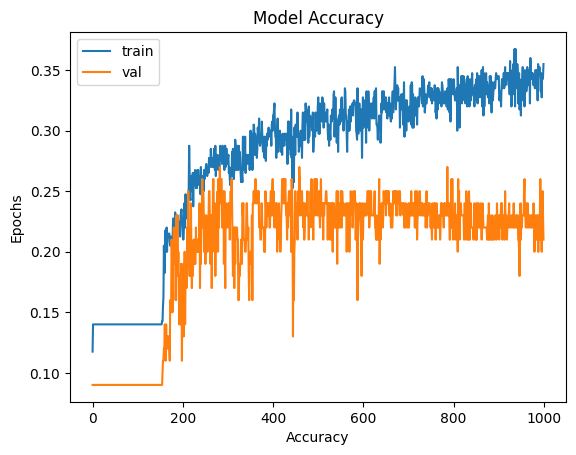

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend(['train','val'])

In [46]:
y_pred_hot=(model.predict(X_test)>0.5)*1
#y_pred = [int(y) for y in y_pred]
print(y_pred_hot.shape)
print(y_test.shape)
print(y_test[1])
print(y_pred_hot[1])

16/16 [==============================] - 0s 2ms/step
(500, 10)
(500, 1)
[8]
[0 1 0 0 0 0 0 0 0 0]


In [ ]:
y_test_hot = np.zeros((y_test.shape[0], y_test.max()+1), dtype=np.float32)
y_test_hot[np.arange(y_test.shape[0]), y_test] = 1
print(y_test_hot.shape)
print(y_test_hot[1])
print(y_pred_hot[1])



In [48]:
#test_eval=model.evaluate(X_test,y_test, verbose=0)
test_eval = model.evaluate(X_test, y_test_hot, batch_size=128)
print("Test Accuracy: ",test_eval[1])

4/4 [==============================] - 0s 4ms/step - loss: 35.5294 - accuracy: 0.0000e+00
Test Accuracy:  0.0


In [49]:
y_pred = (np.argmax(y_pred_hot, axis=1)+1).reshape(-1, 1)
print(y_pred)

[[1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


In [50]:
print(y_test_hot[10])
print(y_pred[10])
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
cm=confusion_matrix(y_test,y_pred)
#cm=multilabel_confusion_matrix(y_test_hot,y_pred) #actual , and predicted
cm

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1]


array([[ 0, 50,  7,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 25, 16,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41, 16,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  6,  0,  0,  0,  0,  0,  0,  0]])

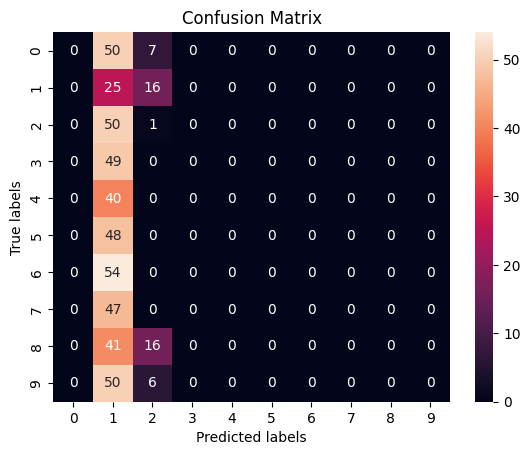

In [51]:
import seaborn as sns
ax= plt.subplot()

sns.heatmap(cm,annot=True,fmt='g',ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Convert one-hot encoded labels back to a single column
y_train_true = np.argmax(y_train, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Predictions for the training set
y_train_pred_hot = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred_hot, axis=1)

# Predictions for the test set
y_test_pred_hot = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_hot, axis=1)

# Accuracy
train_accuracy = accuracy_score(y_train_true, y_train_pred)
test_accuracy = accuracy_score(y_test_true, y_test_pred)

# Precision
train_precision = precision_score(y_train_true, y_train_pred, average='weighted')
test_precision = precision_score(y_test_true, y_test_pred, average='weighted')

# Recall
train_recall = recall_score(y_train_true, y_train_pred, average='weighted')
test_recall = recall_score(y_test_true, y_test_pred, average='weighted')

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Training Precision:", train_precision)
print("Test Precision:", test_precision)

print("Training Recall:", train_recall)
print("Test Recall:", test_recall)


16/16 [==============================] - 0s 2ms/step
Training Accuracy: 0.322
Test Accuracy: 0.0
Training Precision: 0.19901342946192566
Test Precision: 0.0
Training Recall: 0.322
Test Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
